In this notebook, I plan to basic DSA muon quantities. This would be a good notebook to rerun after making any changes to DSA muon ID or selection choices or implementation. I will also plot PF muon quantities for comparison

In [1]:
# python
import os
import sys
import importlib
# columnar analysis
from coffea.nanoevents import NanoAODSchema
from coffea import processor
# local
sidm_path = str(sys.path[0]).split("/sidm")[0]
sidm_path = str(os.getcwd()).split("/sidm")[0]
if sidm_path not in sys.path: sys.path.insert(1, sidm_path)
from sidm.tools import sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()

/tmp/ipykernel_271/267515656.py:6: DeprecationWarning: NanoEventsFactory.from_root() behavior has changed.
    The default behavior is that now it reads the input root file using
    the newly developed virtual arrays backend of awkward instead of dask.
    The backend choice is controlled by the `mode` argument of the method
    which can be set to "eager", "virtual", or "dask".
    The new default is "virtual" while the `delayed` argument has been removed.
    The old `delayed=True` is now equivalent to `mode="dask"`.
    The old `delayed=False` is now equivalent to `mode="eager"`.
    
  from coffea.nanoevents import NanoAODSchema


In [12]:
samples = [
    '2Mu2E_200GeV_0p25GeV_10p0mm',]
    # '2Mu2E_200GeV_0p25GeV_0p01mm',
    # '2Mu2E_200GeV_5p0GeV_2p0mm',
#     '2Mu2E_200GeV_5p0GeV_200p0mm',
# ]
fileset = utilities.make_fileset(samples, "llpNanoAOD_v2", max_files=1, location_cfg="signal_2mu2e_v10.yaml")

In [13]:
runner = processor.Runner(
    executor=processor.IterativeExecutor(),
    #executor=processor.FuturesExecutor(),
    schema=NanoAODSchema,
    maxchunks=1,
    skipbadfiles=True
)

channels = [
    "baseNoLj_matchedLeptons",
    "baseNoLjNoLjsource_matchedLeptons",
]
p = sidm_processor.SidmProcessor(
    channels,
    ["muon_base", "dsaMuon_base", "lepton_genA_base"],
    #verbose=True,
)

output = runner.run(fileset, treename='Events', processor_instance=p)
out = output["out"]

Output()

Signal not in xs cfg, assuming 1fb


In [6]:
def plot_row(plots, samples, ch, ylog=False, density=False):
    n = len(plots)
    plt.subplots(1, n, figsize=(12*n, 10))
    for i, plot in enumerate(plots):
        plt.subplot(1, n, i+1)
        for s in samples:
            utilities.plot(out[s]["hists"][plot][ch, :], density=density)
            if ylog:
                plt.yscale("log")
            plt.legend(samples)

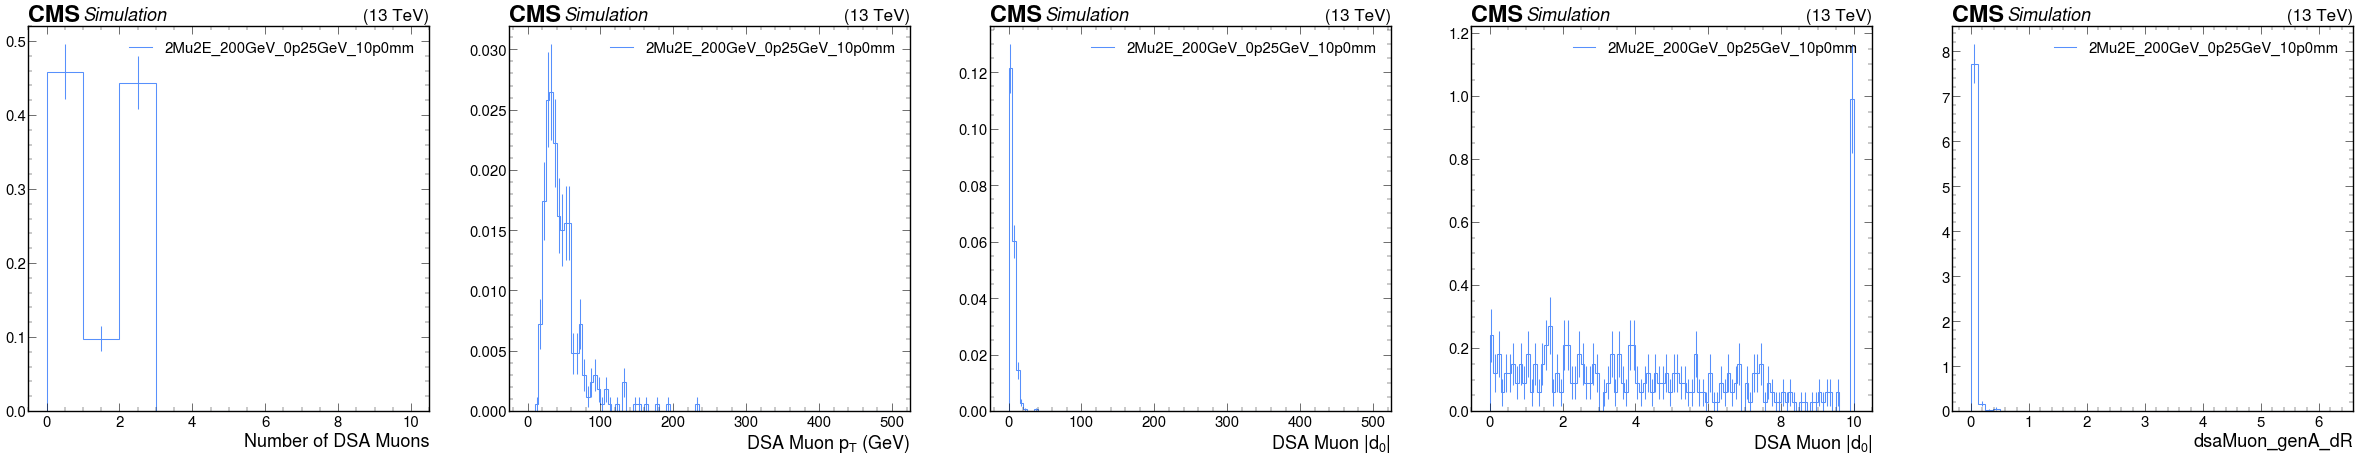

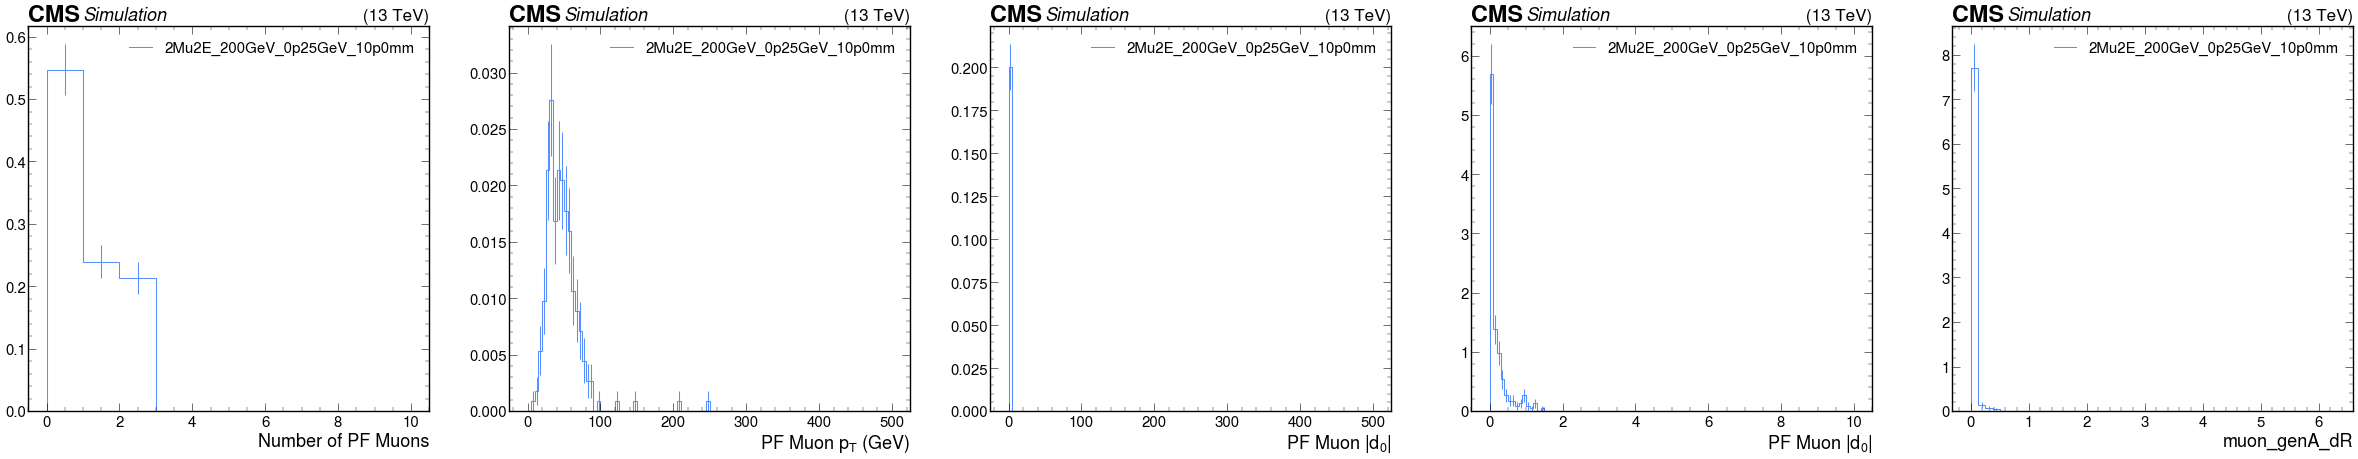

In [14]:
plot_row(["dsaMuon_n", "dsaMuon_pt", "dsaMuon_absD0", "dsaMuon_absD0_lowRange", "dsaMuon_genA_dR"], samples, channels[0], density=True)
plot_row(["muon_n", "muon_pt", "muon_absD0", "muon_absD0_lowRange", "muon_genA_dR"], samples, channels[0], density=True)

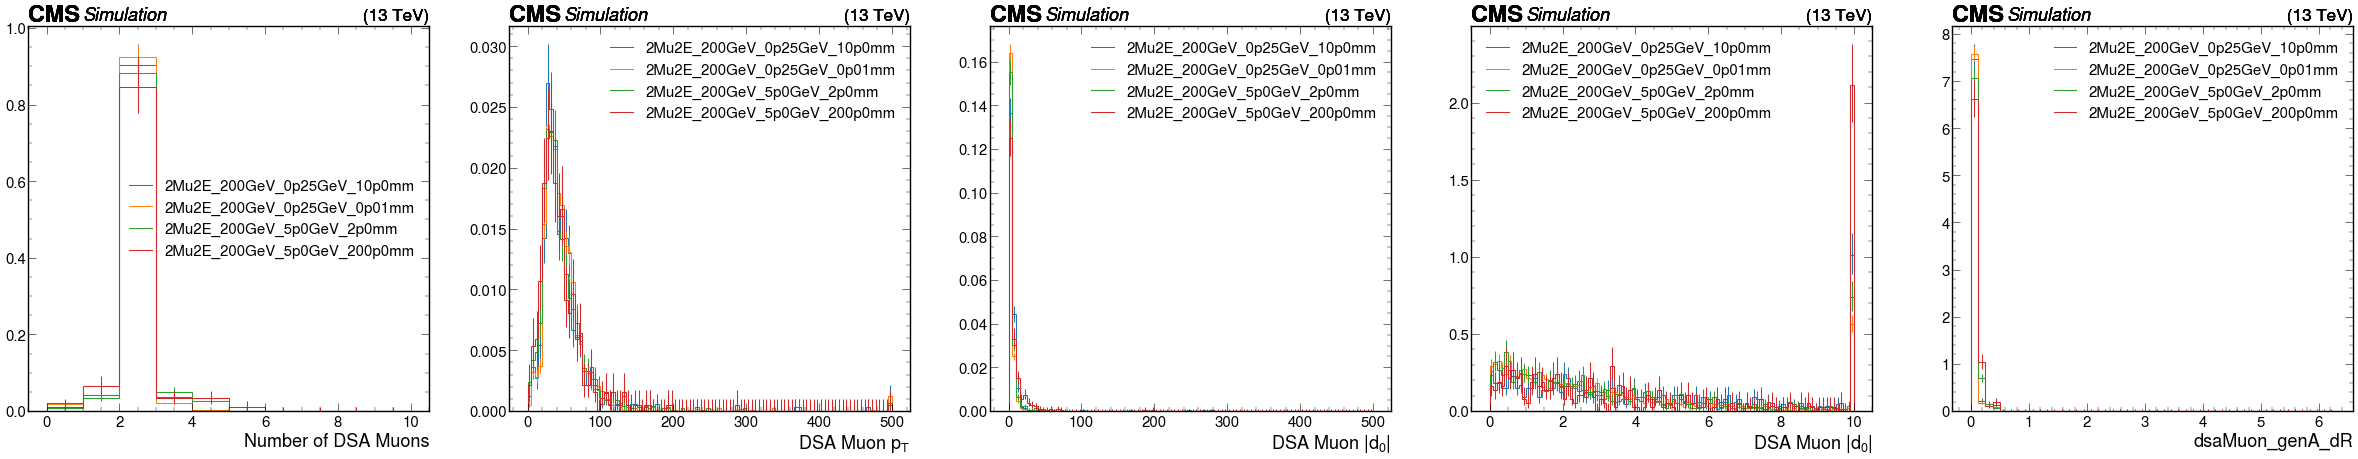

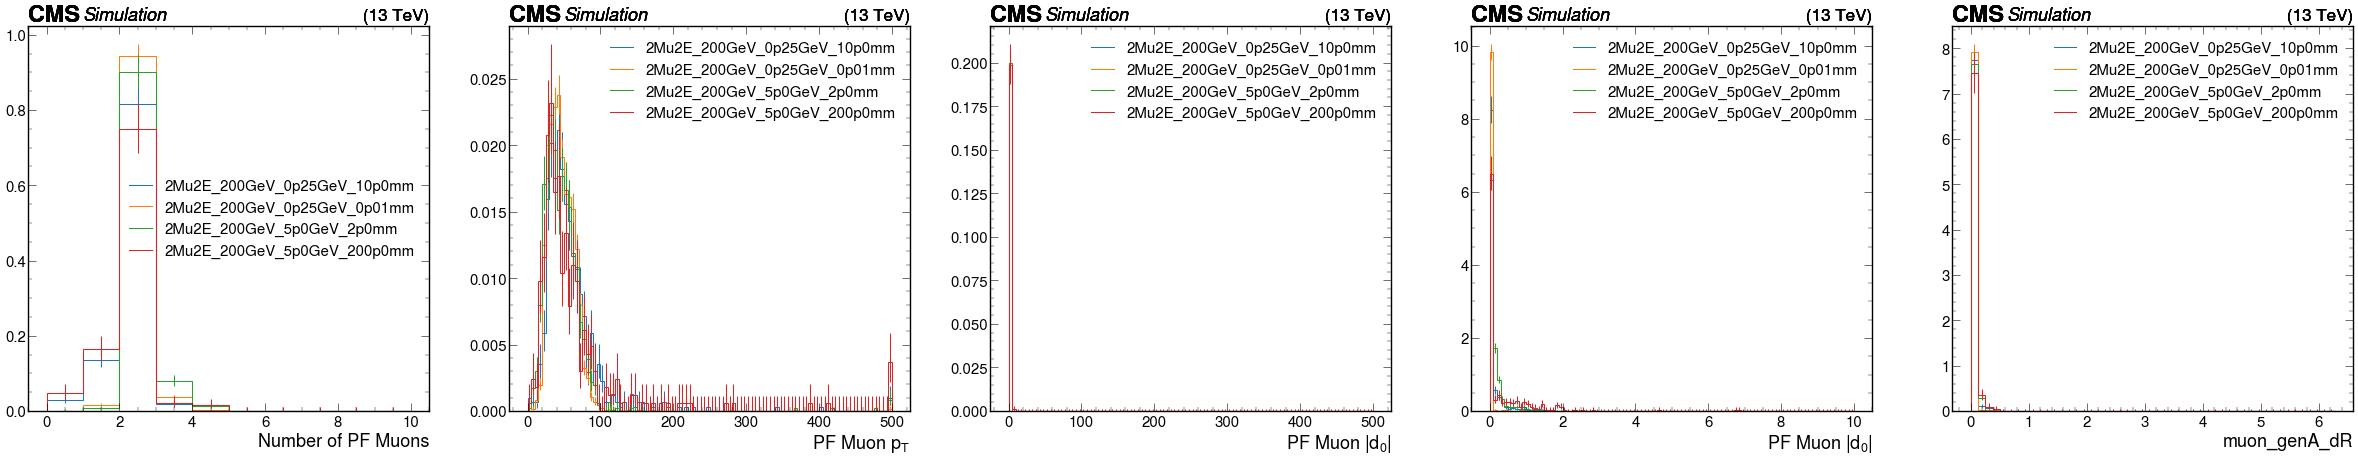

In [6]:
plot_row(["dsaMuon_n", "dsaMuon_pt", "dsaMuon_absD0", "dsaMuon_absD0_lowRange", "dsaMuon_genA_dR"], samples, channels[1], density=True)
plot_row(["muon_n", "muon_pt", "muon_absD0", "muon_absD0_lowRange", "muon_genA_dR"], samples, channels[1], density=True)